This notebook's purpose is to explore the functionality of cellpylib:
https://cellpylib.org/index.html

Basically, the purpose is to handle all things data related

In [45]:
import os

# Limit GPU consumption
DEVICE = '2'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = DEVICE

os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"  # add this
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"

import cellpylib as cpl
import numpy as np
import matplotlib.pyplot as plt

import projects.caproject.convoca_jax.dataloader

import importlib
import sys
importlib.reload(sys.modules['projects.caproject.convoca_jax.dataloader'])

from projects.caproject.convoca_jax.dataloader import make_game_of_life

In [46]:
# We can initialize a 2D grid with the `init_simple`
# function, by passing in the size of the grid 
sample_ca_simple = cpl.init_simple(size=(10, 10))

# We can also achieve similar results with `init_simple2d`
sample_ca_simple2d = cpl.init_simple2d(rows=10, cols=10)

# The type is a numpy array
print(type(sample_ca_simple), sample_ca_simple.shape)

## We can plot with the library function `cpl.plot2d`
# cpl.plot2d(sample_ca_simple)
# cpl.plot2d(sample_ca_simple2d)

# Or, we can also plot multiple cellular automata
# using `plot_multiple`, but this appears to be
# for one-dimensional ca only
# cpl.plot_multiple([sample_ca_simple, 
#                    sample_ca_simple2d
#                 ], titles=['init_simple', 'init_simple2d'])

print(sample_ca_simple2d)

# We can also print the average cell (Shannon) entropy
cpl.average_cell_entropy(sample_ca_simple)

<class 'numpy.ndarray'> (1, 10, 10)
[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]]


1.451907615071406

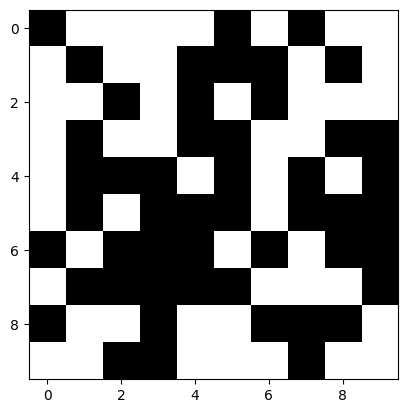

The Shannon entropy of the above CA is: 1.8970674095982063


In [83]:
# We can also initialize a random grid with `init_random2d`

sample_ca_random = cpl.init_random2d(rows=10, cols=10)
cpl.plot2d(sample_ca_random)
print(f"The Shannon entropy of the above CA is: {cpl.average_cell_entropy(sample_ca_random)}")


The Shannon entropy of the library version CA is: 1.9123961459464582
And the entropy of my manual version: 2.11510373150939


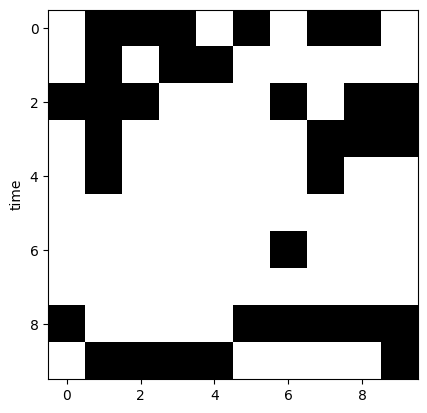

In [96]:
PRINT_STUFF = False

# Let us now evolve the above cellular automaton for one
# time step using the game of life rule
gol_ca = cpl.evolve2d(sample_ca_random, timesteps=2, 
             apply_rule=cpl.game_of_life_rule, memoize='recursive')
if PRINT_STUFF:
    print("Here is the output of the cellpylib game of life update:")
    cpl.plot2d(gol_ca)

# We can also test that our implementation of the game 
# will result in the same update
gol_fn = make_game_of_life()
new_gol_state = gol_fn(sample_ca_random)
new_gol_state_reshaped = np.reshape(new_gol_state, newshape=(1, 10, 10))


if PRINT_STUFF:
    print("And here is the output of the convoca version update:")
    cpl.plot2d(new_gol_state_reshaped)

    print("Check that both versions are correct:")
    np.allclose(new_gol_state_reshaped, gol_ca[1])

print(f"The Shannon entropy of the library version CA is: {cpl.average_cell_entropy(gol_ca)}\n"
      f"And the entropy of my manual version: {cpl.average_cell_entropy(new_gol_state_reshaped)}")

## It seems that when we pass in a single grid

cpl.plot(new_gol_state)


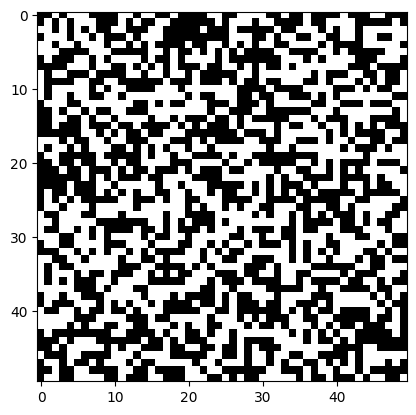

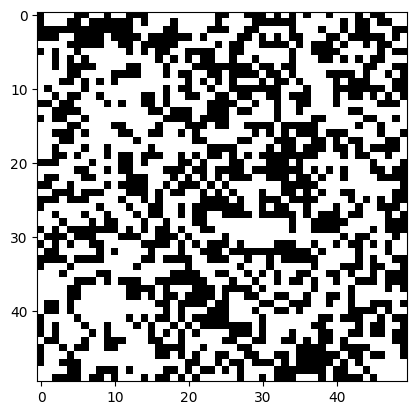

Shannon entropy: 1.695869049098092
The average mutual information is: 1.0695864520212706


In [22]:
random_ca_state = cpl.init_random2d(rows=50, cols=50, k=2)
cpl.plot2d(random_ca_state)
cellular_automaton = cpl.evolve2d(random_ca_state, timesteps=60, neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=555))

cpl.plot2d(cellular_automaton)
entropy = cpl.average_cell_entropy(cellular_automaton)
avg_mutual_information = cpl.average_mutual_information(cellular_automaton)
print(f"Shannon entropy: {entropy}")
print(f"The average mutual information is: {avg_mutual_information}")



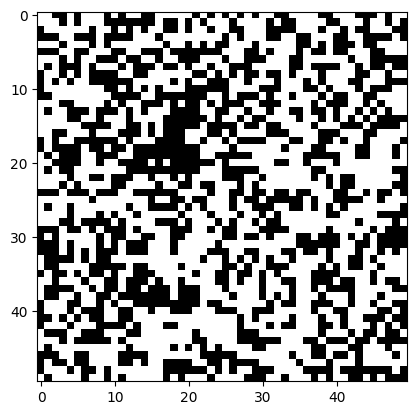

Shannon entropy: 1.6958750992098106
The average mutual information is: 1.0689352049495273


In [26]:
cellular_automaton = cpl.evolve2d(random_ca_state, timesteps=30, neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=555))

cpl.plot2d(cellular_automaton)
entropy = cpl.average_cell_entropy(cellular_automaton)
avg_mutual_information = cpl.average_mutual_information(cellular_automaton)
print(f"Shannon entropy: {entropy}")
print(f"The average mutual information is: {avg_mutual_information}")


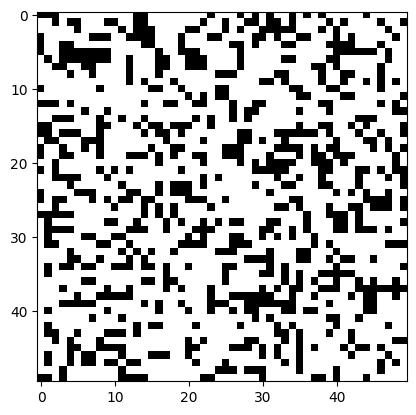

Shannon entropy: 1.6508153947235007
The average mutual information is: 1.0669228274372977


In [24]:
cellular_automaton = cpl.evolve2d(random_ca_state, timesteps=10, neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=777))

cpl.plot2d(cellular_automaton)
entropy = cpl.average_cell_entropy(cellular_automaton)
avg_mutual_information = cpl.average_mutual_information(cellular_automaton)
print(f"Shannon entropy: {entropy}")
print(f"The average mutual information is: {avg_mutual_information}")


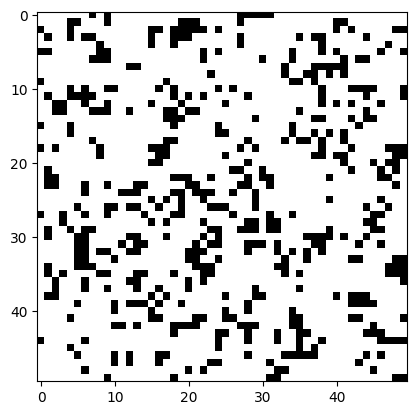

Shannon entropy: 1.665853299982611
The average mutual information is: 1.051790408985057


In [25]:
cellular_automaton = cpl.evolve2d(random_ca_state, timesteps=2, neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=777))

cpl.plot2d(cellular_automaton)
entropy = cpl.average_cell_entropy(cellular_automaton)
avg_mutual_information = cpl.average_mutual_information(cellular_automaton)
print(f"Shannon entropy: {entropy}")
print(f"The average mutual information is: {avg_mutual_information}")


In [113]:
cellular_automaton = cpl.init_random(200)

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=200,
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 74))

# calculate the average cell entropy; the value will be ~0.999 in this case
avg_cell_entropy = cpl.average_cell_entropy(cellular_automaton)
avg_cell_entropy

0.9010587210248017

In [106]:
avg_cell_entropy

0.9993183475879617